In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
file_name = 'data/rail_train_ideal.csv'
df = pd.read_csv(file_name)

In [4]:
df

,X,Y,Z,Classification,Original_cloud_index,Nx,Ny,Nz
0,0.100637,-0.126378,0.511970,2,0,0,0,0
1,0.034017,-0.164694,0.499005,2,0,0,0,0
2,0.096899,-0.012093,0.509889,2,0,0,0,0
3,0.034921,0.432002,0.491926,2,0,0,0,0
4,0.035268,0.155116,0.509867,2,0,0,0,0
...,...,...,...,...,...,...,...,...
199995,0.126839,-0.380893,0.401153,4,3,0,0,0
199996,0.128309,-0.265629,0.395972,4,3,0,0,0
199997,0.007116,0.404864,0.400066,4,3,0,0,0
199998,0.000434,0.376454,0.393843,4,3,0,0,0


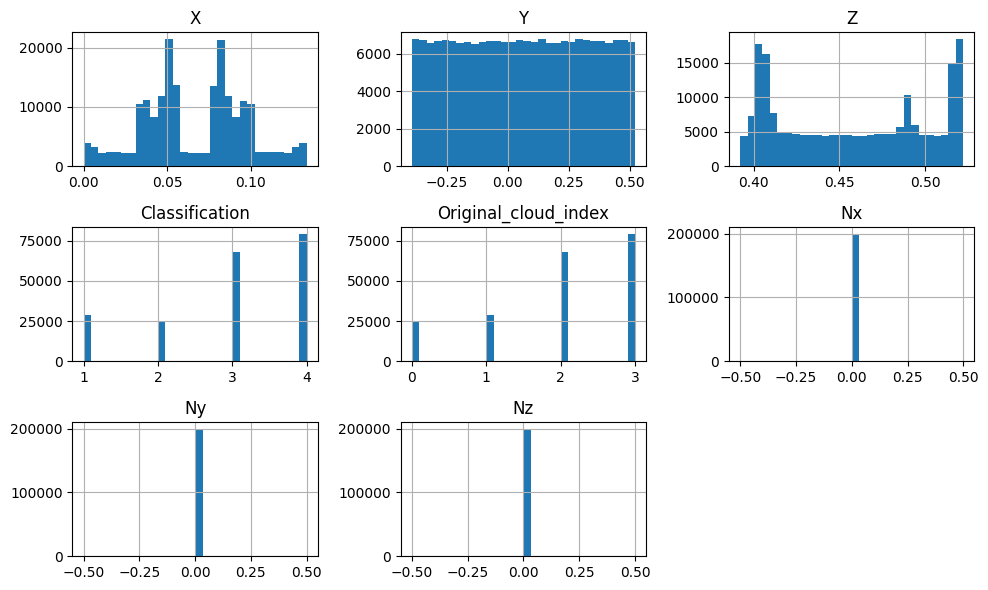

In [5]:
# Histograms for each column
df.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [6]:
# convert from meters to feet
df[['lateral', 'axial', 'vertical']] = df[['X', 'Y', 'Z']] * 3.28084

In [7]:
df['vertical'] = df['vertical'] - df['vertical'].min() # set min to 0
df['axial'] = df['axial'] - df['axial'].min() # set min to 0

In [8]:
df[['lateral_inch', 'axial_inch', 'vertical_inch']] = df[['lateral', 'axial', 'vertical']] * 12 # convert to inches

In [9]:

df[['lateral_inch_round', 'axial_inch_round', 'vertical_inch_round']] = df[['lateral_inch', 'axial_inch', 'vertical_inch']].apply(
    lambda col: col.map(lambda x: round(x * 16) / 16)
)


In [10]:
drop_cols = ['X', 'Y', 'Z', 'Nx', 'Ny', 'Nz']
df = df.drop(columns=drop_cols)

In [11]:
df

,Classification,Original_cloud_index,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round
0,2,0,0.330174,0.871877,0.393169,3.962087,10.462519,4.718032,3.9375,10.4375,4.6875
1,2,0,0.111604,0.746168,0.350633,1.339252,8.954014,4.207599,1.3125,8.9375,4.1875
2,2,0,0.317910,1.246824,0.386342,3.814921,14.961891,4.636103,3.8125,14.9375,4.6250
3,2,0,0.114570,2.703832,0.327411,1.374843,32.445984,3.928936,1.3750,32.4375,3.9375
4,2,0,0.115709,1.795413,0.386273,1.388504,21.544961,4.635275,1.3750,21.5625,4.6250
...,...,...,...,...,...,...,...,...,...,...,...
199995,4,3,0.416138,0.036854,0.029596,4.993662,0.442243,0.355158,5.0000,0.4375,0.3750
199996,4,3,0.420961,0.415016,0.012598,5.051536,4.980196,0.151181,5.0625,5.0000,0.1250
199997,4,3,0.023346,2.614797,0.026030,0.280157,31.377559,0.312362,0.2500,31.3750,0.3125
199998,4,3,0.001424,2.521588,0.005614,0.017087,30.259055,0.067363,0.0000,30.2500,0.0625


In [12]:
df.describe()

,Classification,Original_cloud_index,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2.989155,2.010845,0.218683,1.500538,0.215930,2.624191,18.006452,2.591157,2.624177,18.006473,2.591153
std,1.044425,1.012794,0.099059,0.866899,0.142360,1.188709,10.402791,1.708324,1.188928,10.402860,1.708415
min,1.000000,0.000000,0.000003,0.000000,0.000000,0.000039,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.148002,0.748329,0.063306,1.776024,8.979951,0.759675,1.750000,9.000000,0.750000
50%,3.000000,2.000000,0.217172,1.502055,0.216544,2.606063,18.024665,2.598524,2.625000,18.000000,2.625000
75%,4.000000,3.000000,0.289603,2.253139,0.346418,3.475236,27.037668,4.157018,3.500000,27.062500,4.187500
max,4.000000,3.000000,0.437500,2.999951,0.426949,5.250000,35.999409,5.123385,5.250000,36.000000,5.125000


In [13]:
floor_to_rail_top_nom = 25.5 # feet
floor_to_rail_top_nom_inch = floor_to_rail_top_nom * 12 # inches
span_nom = 75.75 # feet
span_nom_inch = span_nom * 12 # inches
rail_height = 5 # inches

In [14]:

def relative_height_rolling(df, axial_col='axial', vertical_col='vertical', window=0.5):
    """
    For each row, find the minimum vertical_inch within ±window along axial_inch.
    Adds:
      - 'min_in_window'
      - 'relative_vertical_inch' = vertical_inch - min_in_window
    """
    d = df[[axial_col, vertical_col]].copy().sort_values(axial_col).reset_index()
    
    # Use rolling with a custom window based on axial distance
    # Convert to pandas Series for convenience
    ax = d[axial_col]
    vert = d[vertical_col]
    
    # We'll compute min in a sliding window using searchsorted for speed
    min_vals = []
    for i, x in enumerate(ax):
        left = ax.searchsorted(x - window)
        right = ax.searchsorted(x + window, side='right')
        min_vals.append(vert.iloc[left:right].min())
    
    d['min_in_window'] = min_vals
    d['relative_vertical_inch'] = d[vertical_col] - d['min_in_window']
    
    # Merge back to original order
    df = df.copy()
    df['min_in_window'] = d.set_index('index')['min_in_window']
    df['relative_vertical_inch'] = d.set_index('index')['relative_vertical_inch']
    
    return df


df = relative_height_rolling(df, axial_col='axial_inch_round', vertical_col='vertical_inch_round', window=0.5)

In [15]:
df

,Classification,Original_cloud_index,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round,min_in_window,relative_vertical_inch
0,2,0,0.330174,0.871877,0.393169,3.962087,10.462519,4.718032,3.9375,10.4375,4.6875,0.0,4.6875
1,2,0,0.111604,0.746168,0.350633,1.339252,8.954014,4.207599,1.3125,8.9375,4.1875,0.0,4.1875
2,2,0,0.317910,1.246824,0.386342,3.814921,14.961891,4.636103,3.8125,14.9375,4.6250,0.0,4.6250
3,2,0,0.114570,2.703832,0.327411,1.374843,32.445984,3.928936,1.3750,32.4375,3.9375,0.0,3.9375
4,2,0,0.115709,1.795413,0.386273,1.388504,21.544961,4.635275,1.3750,21.5625,4.6250,0.0,4.6250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,4,3,0.416138,0.036854,0.029596,4.993662,0.442243,0.355158,5.0000,0.4375,0.3750,0.0,0.3750
199996,4,3,0.420961,0.415016,0.012598,5.051536,4.980196,0.151181,5.0625,5.0000,0.1250,0.0,0.1250
199997,4,3,0.023346,2.614797,0.026030,0.280157,31.377559,0.312362,0.2500,31.3750,0.3125,0.0,0.3125
199998,4,3,0.001424,2.521588,0.005614,0.017087,30.259055,0.067363,0.0000,30.2500,0.0625,0.0,0.0625


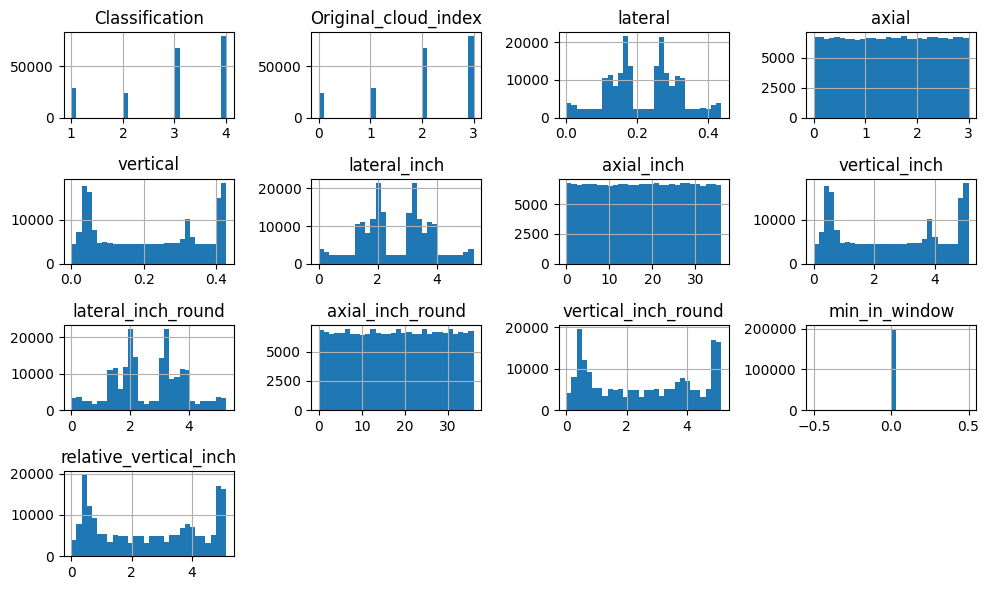

In [16]:
# Histograms for each column
df.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [17]:
dfa_temp =df[df['lateral'] > df['lateral'].mean()].copy()
dfb_temp =df[df['lateral'] < df['lateral'].mean()].copy()

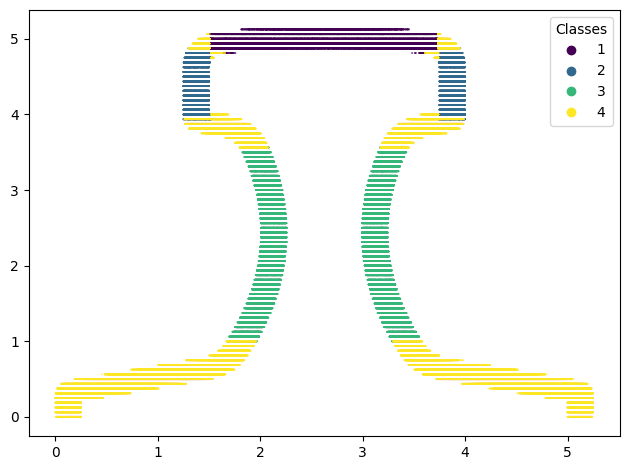

In [18]:
scatter = plt.scatter(df['lateral_inch'], df['relative_vertical_inch'], s=0.1, c=df['Classification'])
plt.legend(*scatter.legend_elements(), title="Classes")
plt.tight_layout()
plt.show()

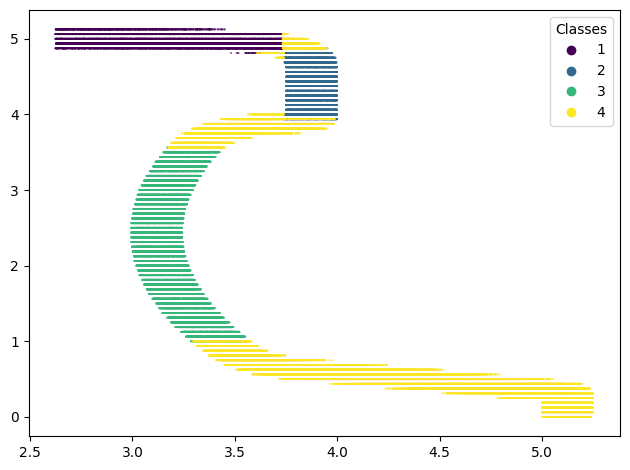

In [19]:
scatter = plt.scatter(dfa_temp['lateral_inch'], dfa_temp['relative_vertical_inch'], s=0.1, c=dfa_temp['Classification'])
plt.legend(*scatter.legend_elements(), title="Classes")
plt.tight_layout()
plt.show()

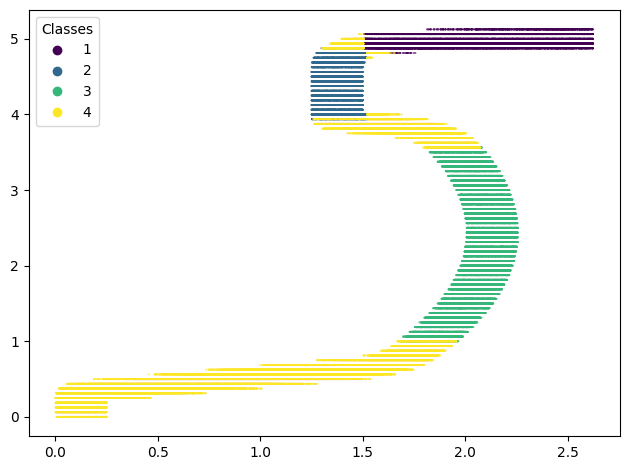

In [20]:
scatter = plt.scatter(dfb_temp['lateral_inch'], dfb_temp['relative_vertical_inch'], s=0.1, c=dfb_temp['Classification'])
plt.legend(*scatter.legend_elements(), title="Classes")
plt.tight_layout()
plt.show()

In [21]:
df

,Classification,Original_cloud_index,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round,min_in_window,relative_vertical_inch
0,2,0,0.330174,0.871877,0.393169,3.962087,10.462519,4.718032,3.9375,10.4375,4.6875,0.0,4.6875
1,2,0,0.111604,0.746168,0.350633,1.339252,8.954014,4.207599,1.3125,8.9375,4.1875,0.0,4.1875
2,2,0,0.317910,1.246824,0.386342,3.814921,14.961891,4.636103,3.8125,14.9375,4.6250,0.0,4.6250
3,2,0,0.114570,2.703832,0.327411,1.374843,32.445984,3.928936,1.3750,32.4375,3.9375,0.0,3.9375
4,2,0,0.115709,1.795413,0.386273,1.388504,21.544961,4.635275,1.3750,21.5625,4.6250,0.0,4.6250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,4,3,0.416138,0.036854,0.029596,4.993662,0.442243,0.355158,5.0000,0.4375,0.3750,0.0,0.3750
199996,4,3,0.420961,0.415016,0.012598,5.051536,4.980196,0.151181,5.0625,5.0000,0.1250,0.0,0.1250
199997,4,3,0.023346,2.614797,0.026030,0.280157,31.377559,0.312362,0.2500,31.3750,0.3125,0.0,0.3125
199998,4,3,0.001424,2.521588,0.005614,0.017087,30.259055,0.067363,0.0000,30.2500,0.0625,0.0,0.0625


In [22]:
df.describe()

,Classification,Original_cloud_index,lateral,axial,vertical,lateral_inch,axial_inch,vertical_inch,lateral_inch_round,axial_inch_round,vertical_inch_round,min_in_window,relative_vertical_inch
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.0,200000.000000
mean,2.989155,2.010845,0.218683,1.500538,0.215930,2.624191,18.006452,2.591157,2.624177,18.006473,2.591153,0.0,2.591153
std,1.044425,1.012794,0.099059,0.866899,0.142360,1.188709,10.402791,1.708324,1.188928,10.402860,1.708415,0.0,1.708415
min,1.000000,0.000000,0.000003,0.000000,0.000000,0.000039,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.000000,1.000000,0.148002,0.748329,0.063306,1.776024,8.979951,0.759675,1.750000,9.000000,0.750000,0.0,0.750000
50%,3.000000,2.000000,0.217172,1.502055,0.216544,2.606063,18.024665,2.598524,2.625000,18.000000,2.625000,0.0,2.625000
75%,4.000000,3.000000,0.289603,2.253139,0.346418,3.475236,27.037668,4.157018,3.500000,27.062500,4.187500,0.0,4.187500
max,4.000000,3.000000,0.437500,2.999951,0.426949,5.250000,35.999409,5.123385,5.250000,36.000000,5.125000,0.0,5.125000


In [23]:
df.to_csv('data/df_trainer_processed.csv', index=False)